## how to read data in dataset.

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
con = sqlite3.connect(r"D:\Python\Project3/zomato_rawdata.sqlite")

In [3]:
df = pd.read_sql_query("SELECT * from Users", con)

In [4]:
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
df.shape

(51717, 18)

In [6]:
df.size

930906

In [7]:
df.dtypes

index                           int64
url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [8]:
df['cuisines'].value_counts

<bound method IndexOpsMixin.value_counts of 0                North Indian, Mughlai, Chinese
1                   Chinese, North Indian, Thai
2                        Cafe, Mexican, Italian
3                    South Indian, North Indian
4                      North Indian, Rajasthani
                          ...                  
51712                               Continental
51713                               Finger Food
51714                               Finger Food
51715                               Finger Food
51716    Finger Food, North Indian, Continental
Name: cuisines, Length: 51717, dtype: object>

## how to deal with the missing values

In [9]:
df.head(5)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [10]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [11]:
df.isnull().sum()/len(df)*100

index                           0.000000
url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [12]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [13]:
df['rate'].replace(('NEW','-'),np.nan, inplace = True)

In [14]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [15]:
type('4.1/5')

str

In [16]:
'4.1/5'.split('/')

['4.1', '5']

In [17]:
'4.1/5'.split('/')[0]

'4.1'

In [18]:
type('4.1/5'.split('/')[0])

str

In [19]:
float('4.1/5'.split('/')[0])

4.1

In [20]:
df['rate'] = df['rate'].apply(lambda x : float(x.split('/')[0]) if type(x) == str else x )

## Q1 is there a relationship between online order option and rating of the restaurants ?

In [21]:
x = pd.crosstab(df['rate'],df['online_order'])

In [22]:
x

online_order,No,Yes
rate,,
1.8,5,0
2.0,11,0
2.1,9,15
2.2,10,16
2.3,29,22
2.4,36,34
2.5,38,63
2.6,83,177
2.7,141,166


<Axes: xlabel='rate'>

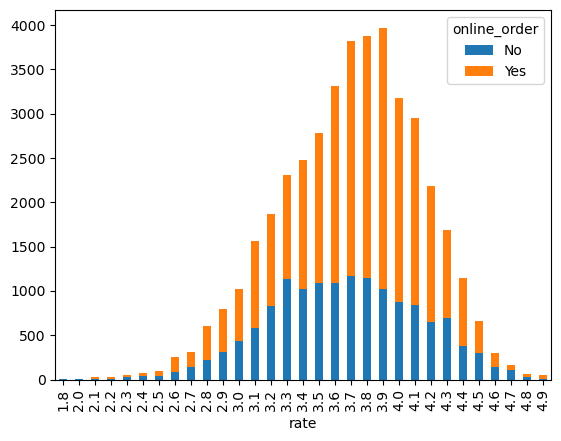

In [23]:
x.plot(kind = 'bar', stacked = True)

In [24]:
x.sum(axis = 1)

rate
1.8       5
2.0      11
2.1      24
2.2      26
2.3      51
2.4      70
2.5     101
2.6     260
2.7     307
2.8     600
2.9     802
3.0    1023
3.1    1561
3.2    1873
3.3    2310
3.4    2476
3.5    2784
3.6    3316
3.7    3821
3.8    3873
3.9    3972
4.0    3183
4.1    2948
4.2    2184
4.3    1693
4.4    1147
4.5     656
4.6     300
4.7     167
4.8      66
4.9      55
dtype: int64

In [25]:
x.sum(axis = 1).astype(float)

rate
1.8       5.0
2.0      11.0
2.1      24.0
2.2      26.0
2.3      51.0
2.4      70.0
2.5     101.0
2.6     260.0
2.7     307.0
2.8     600.0
2.9     802.0
3.0    1023.0
3.1    1561.0
3.2    1873.0
3.3    2310.0
3.4    2476.0
3.5    2784.0
3.6    3316.0
3.7    3821.0
3.8    3873.0
3.9    3972.0
4.0    3183.0
4.1    2948.0
4.2    2184.0
4.3    1693.0
4.4    1147.0
4.5     656.0
4.6     300.0
4.7     167.0
4.8      66.0
4.9      55.0
dtype: float64

In [26]:
x.div(x.sum(axis = 1).astype(float), axis  = 0)

online_order,No,Yes
rate,,
1.8,1.000000,0.000000
2.0,1.000000,0.000000
2.1,0.375000,0.625000
2.2,0.384615,0.615385
2.3,0.568627,0.431373
2.4,0.514286,0.485714
2.5,0.376238,0.623762
2.6,0.319231,0.680769
2.7,0.459283,0.540717


In [27]:
normalized_df = x.div(x.sum(axis = 1).astype(float), axis  = 0) * 100

In [28]:
normalized_df

online_order,No,Yes
rate,,
1.8,100.000000,0.000000
2.0,100.000000,0.000000
2.1,37.500000,62.500000
2.2,38.461538,61.538462
2.3,56.862745,43.137255
2.4,51.428571,48.571429
2.5,37.623762,62.376238
2.6,31.923077,68.076923
2.7,45.928339,54.071661


<Axes: xlabel='rate'>

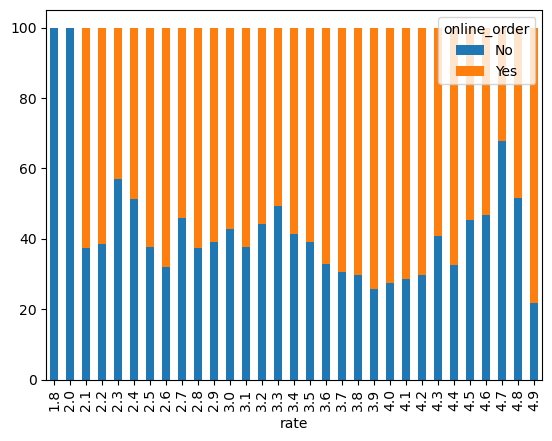

In [29]:
normalized_df.plot(kind = 'bar', stacked = True)

## Data cleaning to perform text analysis

In [30]:
df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', None, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
     

In [31]:
df['rest_type'].isnull().sum()

227

In [32]:
data = df.dropna(subset = ['rest_type'] )

In [33]:
data['rest_type'].isnull().sum()

0

In [34]:
data['rest_type'].str.contains('Quick Bites')

0        False
1        False
2        False
3         True
4        False
         ...  
51712    False
51713    False
51714    False
51715    False
51716    False
Name: rest_type, Length: 51490, dtype: bool

In [35]:
data[data['rest_type'].str.contains('Quick Bites')]

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
23,23,https://www.zomato.com/bangalore/my-tea-house-...,"224/Y, 4th Phase, 7th Block, 100 Feet Ring Roa...",My Tea House,Yes,No,3.6,62,080 65975430\r\n+91 7337733798,Banashankari,"Quick Bites, Cafe","Pasta, Iced Tea","Italian, Fast Food, Cafe, European",600,"[('Rated 4.0', ""RATED\n So, went here with fr...",[],Cafes,Banashankari
26,26,https://www.zomato.com/bangalore/coffee-tindi-...,"27th Cross Rd, Banashankari Stage II, Banashan...",Coffee Tindi,Yes,No,3.8,75,+91 9945758046,Banashankari,"Cafe, Quick Bites",None,"Cafe, South Indian",200,"[('Rated 5.0', 'RATED\n please provide some e...",[],Cafes,Banashankari
31,31,https://www.zomato.com/bangalore/foodiction-1-...,"2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...",Foodiction,Yes,No,2.8,506,+91 9916107070,Banashankari,Quick Bites,"Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...","North Indian, Fast Food, Chinese, Burger",500,"[('Rated 1.0', ""RATED\n Worst restaurant ever...",[],Delivery,Banashankari
34,34,https://www.zomato.com/bangalore/faasos-banash...,"80, BDA Complex, 2nd Stage, Banashankari, Bang...",Faasos,Yes,No,4.2,415,+91 7700020020,Banashankari,Quick Bites,"Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...","North Indian, Biryani, Fast Food",500,"[('Rated 3.0', 'RATED\n Not worth for the mon...","['Chole Kulcha Meal', 'Upvas Aloo Paratha With...",Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51641,51641,https://www.zomato.com/bangalore/andhra-spices...,"188, ITPL Main Road, Brookefields, Bangalore, ...",Andhra Spices,No,No,3.2,4,None,Brookefield,Quick Bites,None,"Andhra, Chinese, South Indian",None,"[('Rated 2.0', ""RATED\n Food is not upto the ...",[],Dine-out,Whitefield
51642,51642,https://www.zomato.com/bangalore/basaveshwara-...,"Nanjudeshwari complex, Oppsite Brookefield Mal...",Basaveshwara Khanavali,No,No,NaN,0,+91 9740912864\n+91 7353747430,Brookefield,Quick Bites,None,South Indian,200,[],[],Dine-out,Whitefield
51643,51643,https://www.zomato.com/bangalore/new-ambur-bir...,"AECS Layout, ITPL Main Road, Brookefield, Bang...",New Ambur Biryani,No,No,NaN,0,+91 9443087893,Brookefield,Quick Bites,None,"Biryani, Kebab",300,[],[],Dine-out,Whitefield
51644,51644,https://www.zomato.com/bangalore/punjabi-thadk...,"7/3, ASK Tower, Kundanahalli Gate, Next to Bat...",Punjabi Thadka,No,No,NaN,0,+91 7338330336\n+91 9591568221,Brookefield,Quick Bites,None,North Indian,400,[],[],Dine-out,Whitefield


In [36]:
quick_bites_df = data[data['rest_type'].str.contains('Quick Bites')]

In [37]:
quick_bites_df.shape

(20639, 18)

In [38]:
quick_bites_df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [39]:
quick_bites_df['reviews_list']

3        [('Rated 4.0', "RATED\n  Great food and proper...
23       [('Rated 4.0', "RATED\n  So, went here with fr...
26       [('Rated 5.0', 'RATED\n  please provide some e...
31       [('Rated 1.0', "RATED\n  Worst restaurant ever...
34       [('Rated 3.0', 'RATED\n  Not worth for the mon...
                               ...                        
51641    [('Rated 2.0', "RATED\n  Food is not upto the ...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [('Rated 5.0', "RATED\n  I was randomly lookin...
Name: reviews_list, Length: 20639, dtype: object

In [40]:
quick_bites_df['reviews_list'].apply(lambda x: x.lower())

3        [('rated 4.0', "rated\n  great food and proper...
23       [('rated 4.0', "rated\n  so, went here with fr...
26       [('rated 5.0', 'rated\n  please provide some e...
31       [('rated 1.0', "rated\n  worst restaurant ever...
34       [('rated 3.0', 'rated\n  not worth for the mon...
                               ...                        
51641    [('rated 2.0', "rated\n  food is not upto the ...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [('rated 5.0', "rated\n  i was randomly lookin...
Name: reviews_list, Length: 20639, dtype: object

In [41]:
quick_bites_df['reviews_list'] = quick_bites_df['reviews_list'].apply(lambda x: x.lower())

In [42]:
from nltk.corpus import RegexpTokenizer

In [43]:
tokenizer = RegexpTokenizer('[a-zA-Z]+')

In [44]:
tokenizer

RegexpTokenizer(pattern='[a-zA-Z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

In [45]:
quick_bites_df['reviews_list'][3]

'[(\'rated 4.0\', "rated\\n  great food and proper karnataka style full meals. been there twice and was fully satisfied.. will give 5 stars if it\'s well managed............"), (\'rated 2.0\', \'rated\\n  reached the place at 3pm on saturday. half of the items on the menu were over. what was annoying was is the food was cold. the taste was also very average. only dosa and holige were good. there were very few people in the restaurant and the service was still very slow. the waiters were all standing in one corner and talking. had to call them repeatedly.\'), (\'rated 4.0\', \'rated\\n  had been here, good food served and tasty,good place to go with freinds and family, should be first to get served well with all food. one of the good hotel there for this price.\'), (\'rated 2.0\', \'rated\\n  how can a udupi restaurant be so dirty.the floor the walls the waiters are all stained in food.why cant they clean it? the floor even had decorative colour paper every where and lot of food.now com

In [46]:
tokenizer.tokenize(quick_bites_df['reviews_list'][3])

['rated',
 'rated',
 'n',
 'great',
 'food',
 'and',
 'proper',
 'karnataka',
 'style',
 'full',
 'meals',
 'been',
 'there',
 'twice',
 'and',
 'was',
 'fully',
 'satisfied',
 'will',
 'give',
 'stars',
 'if',
 'it',
 's',
 'well',
 'managed',
 'rated',
 'rated',
 'n',
 'reached',
 'the',
 'place',
 'at',
 'pm',
 'on',
 'saturday',
 'half',
 'of',
 'the',
 'items',
 'on',
 'the',
 'menu',
 'were',
 'over',
 'what',
 'was',
 'annoying',
 'was',
 'is',
 'the',
 'food',
 'was',
 'cold',
 'the',
 'taste',
 'was',
 'also',
 'very',
 'average',
 'only',
 'dosa',
 'and',
 'holige',
 'were',
 'good',
 'there',
 'were',
 'very',
 'few',
 'people',
 'in',
 'the',
 'restaurant',
 'and',
 'the',
 'service',
 'was',
 'still',
 'very',
 'slow',
 'the',
 'waiters',
 'were',
 'all',
 'standing',
 'in',
 'one',
 'corner',
 'and',
 'talking',
 'had',
 'to',
 'call',
 'them',
 'repeatedly',
 'rated',
 'rated',
 'n',
 'had',
 'been',
 'here',
 'good',
 'food',
 'served',
 'and',
 'tasty',
 'good',
 'plac

In [47]:
sample = quick_bites_df[0:10000]

In [48]:
sample

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('rated 4.0', ""rated\n great food and proper...",[],Buffet,Banashankari
23,23,https://www.zomato.com/bangalore/my-tea-house-...,"224/Y, 4th Phase, 7th Block, 100 Feet Ring Roa...",My Tea House,Yes,No,3.6,62,080 65975430\r\n+91 7337733798,Banashankari,"Quick Bites, Cafe","Pasta, Iced Tea","Italian, Fast Food, Cafe, European",600,"[('rated 4.0', ""rated\n so, went here with fr...",[],Cafes,Banashankari
26,26,https://www.zomato.com/bangalore/coffee-tindi-...,"27th Cross Rd, Banashankari Stage II, Banashan...",Coffee Tindi,Yes,No,3.8,75,+91 9945758046,Banashankari,"Cafe, Quick Bites",None,"Cafe, South Indian",200,"[('rated 5.0', 'rated\n please provide some e...",[],Cafes,Banashankari
31,31,https://www.zomato.com/bangalore/foodiction-1-...,"2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...",Foodiction,Yes,No,2.8,506,+91 9916107070,Banashankari,Quick Bites,"Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...","North Indian, Fast Food, Chinese, Burger",500,"[('rated 1.0', ""rated\n worst restaurant ever...",[],Delivery,Banashankari
34,34,https://www.zomato.com/bangalore/faasos-banash...,"80, BDA Complex, 2nd Stage, Banashankari, Bang...",Faasos,Yes,No,4.2,415,+91 7700020020,Banashankari,Quick Bites,"Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...","North Indian, Biryani, Fast Food",500,"[('rated 3.0', 'rated\n not worth for the mon...","['Chole Kulcha Meal', 'Upvas Aloo Paratha With...",Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25000,25000,https://www.zomato.com/bangalore/sankys-burger...,"50,Hennur Main Road, Hennur, Bangalore",Sanky's Burger House,Yes,No,4.3,332,+91 9886738143,Hennur,Quick Bites,"Burgers, Beef Burger, Cheesy Fries, Peri Peri ...","Burger, Fast Food",300,"[('rated 5.0', ""rated\n being a loyal custome...","['French Fries', 'Cheese Fries', 'Chicken Chil...",Dine-out,Kalyan Nagar
25001,25001,https://www.zomato.com/bangalore/al-noor-resta...,"10/122, Ground Floor, Ghousia Complex, Near Ri...",Al-Noor Restaurant,Yes,No,NaN,0,+91 7483450467,Nagawara,Quick Bites,None,"Chinese, North Indian, Mughlai",400,"[('rated 5.0', 'rated\n it was good visiting ...","['Schezwan Chicken Fried Rice', 'Schezwan Chic...",Dine-out,Kalyan Nagar
25007,25007,https://www.zomato.com/bangalore/al-baik-tando...,"3, Income Tax Layout, Opposite HP Petrol Bunk,...",Al-Baik Tandoori Restaurant,Yes,No,3.6,113,+91 9986542994,Nagawara,Quick Bites,None,"North Indian, Chinese, Arabian, Biryani, Rolls",450,"[('rated 5.0', 'rated\n halal tag is not ther...","['Chicken Fried Rice', 'Chicken Noodles', 'Ghe...",Dine-out,Kalyan Nagar
25008,25008,https://www.zomato.com/bangalore/pooja-dosa-ca...,"10, 9th Main Road, Chairman's Layout, Banaswad...",Pooja Dosa Camp,No,No,4.0,130,+91 8762385497,Banaswadi,Quick Bites,"Podi Dosa, Vada, Pongal, Ghee Dosa, Masala Dos...",South Indian,200,"[('rated 5.0', 'rated\n iã\x83ã\x83ã\x82ã...",[],Dine-out,Kalyan Nagar


In [49]:
reviews_token = sample['reviews_list'].apply(tokenizer.tokenize)

In [50]:
reviews_token

3        [rated, rated, n, great, food, and, proper, ka...
23       [rated, rated, n, so, went, here, with, friend...
26       [rated, rated, n, please, provide, some, extra...
31       [rated, rated, n, worst, restaurant, ever, veg...
34       [rated, rated, n, not, worth, for, the, money,...
                               ...                        
25000    [rated, rated, n, being, a, loyal, customer, f...
25001    [rated, rated, n, it, was, good, visiting, the...
25007    [rated, rated, n, halal, tag, is, not, there, ...
25008    [rated, rated, n, i, x, x, x, x, x, x, x, x, m...
25009    [rated, rated, n, nit, tasted, like, mint, ric...
Name: reviews_list, Length: 10000, dtype: object

## perform unigram analysis and removal of stopwords

In [51]:
import nltk

In [52]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Daksha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
from nltk.corpus import stopwords

In [54]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [55]:
stop = stopwords.words('english')

In [56]:
stop.extend(['rated','n','nan','x','RATED','Rated'])

In [57]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [58]:
rev3 = reviews_token[3]
print(rev3)

['rated', 'rated', 'n', 'great', 'food', 'and', 'proper', 'karnataka', 'style', 'full', 'meals', 'been', 'there', 'twice', 'and', 'was', 'fully', 'satisfied', 'will', 'give', 'stars', 'if', 'it', 's', 'well', 'managed', 'rated', 'rated', 'n', 'reached', 'the', 'place', 'at', 'pm', 'on', 'saturday', 'half', 'of', 'the', 'items', 'on', 'the', 'menu', 'were', 'over', 'what', 'was', 'annoying', 'was', 'is', 'the', 'food', 'was', 'cold', 'the', 'taste', 'was', 'also', 'very', 'average', 'only', 'dosa', 'and', 'holige', 'were', 'good', 'there', 'were', 'very', 'few', 'people', 'in', 'the', 'restaurant', 'and', 'the', 'service', 'was', 'still', 'very', 'slow', 'the', 'waiters', 'were', 'all', 'standing', 'in', 'one', 'corner', 'and', 'talking', 'had', 'to', 'call', 'them', 'repeatedly', 'rated', 'rated', 'n', 'had', 'been', 'here', 'good', 'food', 'served', 'and', 'tasty', 'good', 'place', 'to', 'go', 'with', 'freinds', 'and', 'family', 'should', 'be', 'first', 'to', 'get', 'served', 'well', 

In [59]:
print([token for token in rev3 if token not in stop])

['great', 'food', 'proper', 'karnataka', 'style', 'full', 'meals', 'twice', 'fully', 'satisfied', 'give', 'stars', 'well', 'managed', 'reached', 'place', 'pm', 'saturday', 'half', 'items', 'menu', 'annoying', 'food', 'cold', 'taste', 'also', 'average', 'dosa', 'holige', 'good', 'people', 'restaurant', 'service', 'still', 'slow', 'waiters', 'standing', 'one', 'corner', 'talking', 'call', 'repeatedly', 'good', 'food', 'served', 'tasty', 'good', 'place', 'go', 'freinds', 'family', 'first', 'get', 'served', 'well', 'food', 'one', 'good', 'hotel', 'price', 'udupi', 'restaurant', 'dirty', 'floor', 'walls', 'waiters', 'stained', 'food', 'cant', 'clean', 'floor', 'even', 'decorative', 'colour', 'paper', 'every', 'lot', 'food', 'coming', 'taste', 'food', 'pretty', 'decent', 'chargw', 'upset', 'us', 'menu', 'says', 'serve', 'thambuli', 'two', 'variety', 'rice', 'etc', 'still', 'charged', 'us', 'full', 'amount', 'lastly', 'u', 'r', 'ok', 'b', 'seated', 'random', 'people', 'adjust', 'table', 'mann

In [60]:
reviews_token_clean = reviews_token.apply(lambda each_review: [token for token in each_review if token not in stop])

In [61]:
reviews_token_clean

3        [great, food, proper, karnataka, style, full, ...
23       [went, friends, tea, ambience, striking, say, ...
26       [please, provide, extra, sambal, quantity, les...
31       [worst, restaurant, ever, veg, manchurian, wor...
34       [worth, money, pay, ambience, good, enough, se...
                               ...                        
25000    [loyal, customer, last, two, years, must, say,...
25001    [good, visiting, place, better, compared, hote...
25007    [halal, tag, food, could, haram, restaurants, ...
25008    [sucker, simple, south, indian, breakfast, pla...
25009    [nit, tasted, like, mint, rice, hint, chicken,...
Name: reviews_list, Length: 10000, dtype: object

In [62]:
type(reviews_token_clean)

pandas.core.series.Series

In [63]:
total_reviews_2D = list(reviews_token_clean)

In [64]:
total_reviews_1D = []
for reviews in total_reviews_2D:
    for words in reviews:
        total_reviews_1D.append(words)

In [65]:
total_reviews_1D

['great',
 'food',
 'proper',
 'karnataka',
 'style',
 'full',
 'meals',
 'twice',
 'fully',
 'satisfied',
 'give',
 'stars',
 'well',
 'managed',
 'reached',
 'place',
 'pm',
 'saturday',
 'half',
 'items',
 'menu',
 'annoying',
 'food',
 'cold',
 'taste',
 'also',
 'average',
 'dosa',
 'holige',
 'good',
 'people',
 'restaurant',
 'service',
 'still',
 'slow',
 'waiters',
 'standing',
 'one',
 'corner',
 'talking',
 'call',
 'repeatedly',
 'good',
 'food',
 'served',
 'tasty',
 'good',
 'place',
 'go',
 'freinds',
 'family',
 'first',
 'get',
 'served',
 'well',
 'food',
 'one',
 'good',
 'hotel',
 'price',
 'udupi',
 'restaurant',
 'dirty',
 'floor',
 'walls',
 'waiters',
 'stained',
 'food',
 'cant',
 'clean',
 'floor',
 'even',
 'decorative',
 'colour',
 'paper',
 'every',
 'lot',
 'food',
 'coming',
 'taste',
 'food',
 'pretty',
 'decent',
 'chargw',
 'upset',
 'us',
 'menu',
 'says',
 'serve',
 'thambuli',
 'two',
 'variety',
 'rice',
 'etc',
 'still',
 'charged',
 'us',
 'full'

In [66]:
from nltk import FreqDist

In [67]:
fd = FreqDist()

In [68]:
for word in total_reviews_1D:
    fd[word] = fd[word] +1

In [69]:
fd.most_common(10)

[('food', 78003),
 ('good', 77130),
 ('place', 61449),
 ('chicken', 34377),
 ('taste', 31380),
 ('ordered', 24166),
 ('one', 19159),
 ('try', 18888),
 ('like', 18765),
 ('also', 18247)]

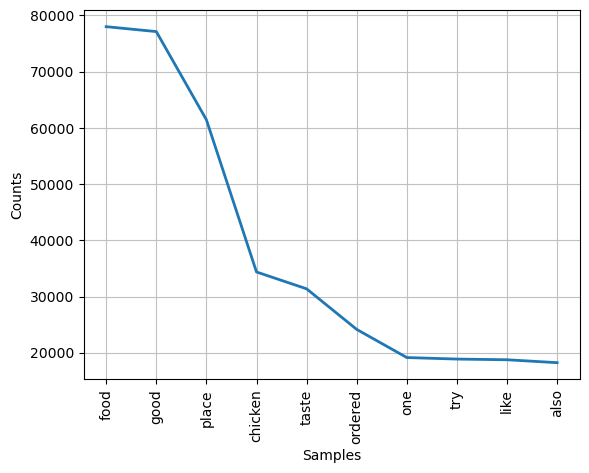

<Axes: xlabel='Samples', ylabel='Counts'>

In [70]:
fd.plot(10)

## Performing Bi-gram and Trigram analysis

In [71]:
from nltk import bigrams, trigrams

In [72]:
bi_gram = bigrams(total_reviews_1D)

In [73]:
print(bi_gram)

<generator object bigrams at 0x0000021DEF966340>


In [74]:
fd_bigram = FreqDist()

for bigrams in bi_gram:
    fd_bigram[bigrams] = fd_bigram[bigrams] + 1

In [75]:
fd_bigram.most_common(10)

[(('must', 'try'), 5448),
 (('good', 'food'), 5340),
 (('food', 'good'), 5135),
 (('north', 'indian'), 4296),
 (('really', 'good'), 4102),
 (('pocket', 'friendly'), 3840),
 (('taste', 'good'), 3762),
 (('south', 'indian'), 3733),
 (('good', 'place'), 3715),
 (('value', 'money'), 3109)]

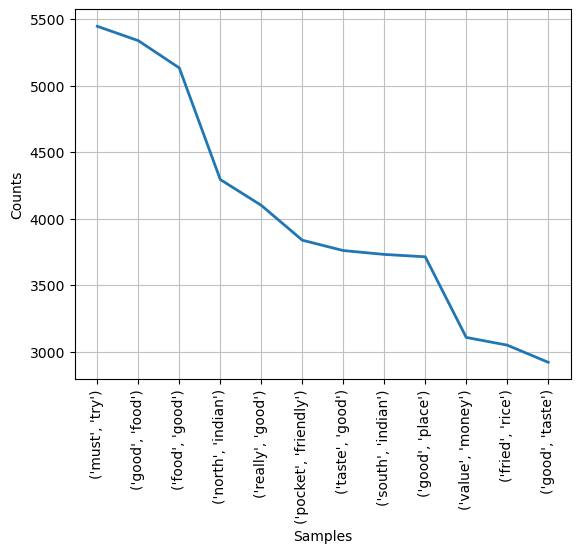

<Axes: xlabel='Samples', ylabel='Counts'>

In [76]:
fd_bigram.plot(12)

In [77]:
tri_gram = trigrams(total_reviews_1D)

In [78]:
fd_trigram = FreqDist()

for tri in tri_gram:
    fd_trigram[tri]= fd_trigram[tri]+1

In [79]:
fd_trigram.most_common(20)

[(('north', 'indian', 'food'), 1343),
 (('south', 'indian', 'food'), 824),
 (('paneer', 'butter', 'masala'), 821),
 (('good', 'food', 'good'), 666),
 (('chicken', 'fried', 'rice'), 568),
 (('must', 'visit', 'place'), 563),
 (('ordered', 'chicken', 'biryani'), 555),
 (('worst', 'food', 'ever'), 536),
 (('veg', 'non', 'veg'), 451),
 (('pocket', 'friendly', 'place'), 436),
 (('good', 'value', 'money'), 412),
 (('like', 'home', 'made'), 401),
 (('home', 'made', 'food'), 385),
 (('must', 'try', 'place'), 376),
 (('food', 'really', 'good'), 362),
 (('south', 'indian', 'breakfast'), 355),
 (('good', 'quality', 'food'), 346),
 (('north', 'indian', 'dishes'), 341),
 (('food', 'reasonable', 'price'), 323),
 (('food', 'quality', 'good'), 315)]

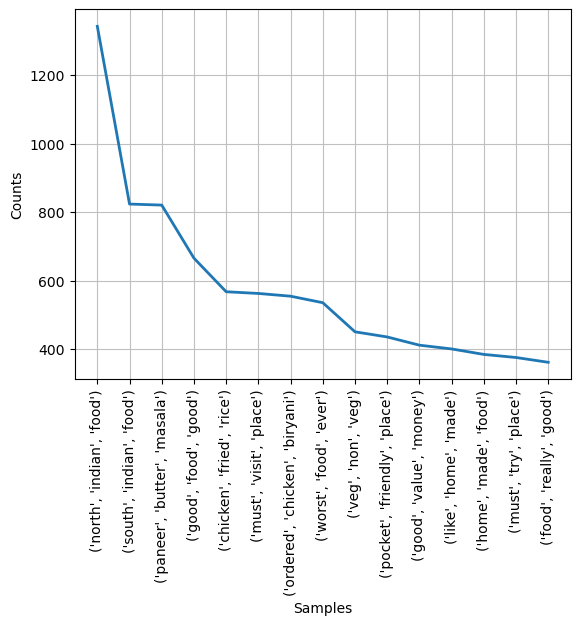

<Axes: xlabel='Samples', ylabel='Counts'>

In [80]:
fd_trigram.plot(15)

## Extract Geographical co-ordinates from the data 

In [81]:
!pip install geocoder
!pip install geopy 

In [82]:
df['location']

0                      Banashankari
1                      Banashankari
2                      Banashankari
3                      Banashankari
4                      Basavanagudi
                    ...            
51712                    Whitefield
51713                    Whitefield
51714                    Whitefield
51715    ITPL Main Road, Whitefield
51716    ITPL Main Road, Whitefield
Name: location, Length: 51717, dtype: object

In [83]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', None, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan

In [84]:
len(df['location'].unique())

94

In [85]:
df['location'] = df['location'] + ", Bangalore, Karnataka, India"

In [86]:
df['location'].unique()

array(['Banashankari, Bangalore, Karnataka, India',
       'Basavanagudi, Bangalore, Karnataka, India',
       'Mysore Road, Bangalore, Karnataka, India',
       'Jayanagar, Bangalore, Karnataka, India',
       'Kumaraswamy Layout, Bangalore, Karnataka, India',
       'Rajarajeshwari Nagar, Bangalore, Karnataka, India',
       'Vijay Nagar, Bangalore, Karnataka, India',
       'Uttarahalli, Bangalore, Karnataka, India',
       'JP Nagar, Bangalore, Karnataka, India',
       'South Bangalore, Bangalore, Karnataka, India',
       'City Market, Bangalore, Karnataka, India',
       'Nagarbhavi, Bangalore, Karnataka, India',
       'Bannerghatta Road, Bangalore, Karnataka, India',
       'BTM, Bangalore, Karnataka, India',
       'Kanakapura Road, Bangalore, Karnataka, India',
       'Bommanahalli, Bangalore, Karnataka, India', nan,
       'CV Raman Nagar, Bangalore, Karnataka, India',
       'Electronic City, Bangalore, Karnataka, India',
       'HSR, Bangalore, Karnataka, India',
       '

In [87]:
df_copy = df.copy()

In [88]:
df_copy['location']

0                Banashankari, Bangalore, Karnataka, India
1                Banashankari, Bangalore, Karnataka, India
2                Banashankari, Bangalore, Karnataka, India
3                Banashankari, Bangalore, Karnataka, India
4                Basavanagudi, Bangalore, Karnataka, India
                               ...                        
51712              Whitefield, Bangalore, Karnataka, India
51713              Whitefield, Bangalore, Karnataka, India
51714              Whitefield, Bangalore, Karnataka, India
51715    ITPL Main Road, Whitefield, Bangalore, Karnata...
51716    ITPL Main Road, Whitefield, Bangalore, Karnata...
Name: location, Length: 51717, dtype: object

In [89]:
df_copy['location'].isnull().sum()

21

In [90]:
df_copy = df_copy.dropna(subset=['location'])

In [91]:
df_copy['location'].isnull().sum()

0

In [92]:
locations_df = pd.DataFrame(df_copy['location'].unique())

In [93]:
locations_df.columns = ['name']

In [94]:
locations_df

,name
0,"Banashankari, Bangalore, Karnataka, India"
1,"Basavanagudi, Bangalore, Karnataka, India"
2,"Mysore Road, Bangalore, Karnataka, India"
3,"Jayanagar, Bangalore, Karnataka, India"
4,"Kumaraswamy Layout, Bangalore, Karnataka, India"
...,...
88,"West Bangalore, Bangalore, Karnataka, India"
89,"Magadi Road, Bangalore, Karnataka, India"
90,"Yelahanka, Bangalore, Karnataka, India"
91,"Sahakara Nagar, Bangalore, Karnataka, India"


In [95]:
from geopy.geocoders import Nominatim

In [96]:
geolocator = Nominatim(user_agent='app',timeout=None)

In [97]:
lat = []
lon = []

for loc in locations_df['name']:
    loc = geolocator.geocode(loc)
    if loc is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(loc.latitude)
        lon.append(loc.longitude)

In [98]:
locations_df['Latitude'] = lat 
locations_df['Longitude'] = lon

In [99]:
locations_df

,name,Latitude,Longitude
0,"Banashankari, Bangalore, Karnataka, India",12.931558,77.547927
1,"Basavanagudi, Bangalore, Karnataka, India",12.941726,77.575502
2,"Mysore Road, Bangalore, Karnataka, India",12.946662,77.530090
3,"Jayanagar, Bangalore, Karnataka, India",12.929273,77.582423
4,"Kumaraswamy Layout, Bangalore, Karnataka, India",12.906768,77.559502
...,...,...,...
88,"West Bangalore, Bangalore, Karnataka, India",13.009476,77.553089
89,"Magadi Road, Bangalore, Karnataka, India",12.975608,77.555356
90,"Yelahanka, Bangalore, Karnataka, India",13.100698,77.596345
91,"Sahakara Nagar, Bangalore, Karnataka, India",13.062147,77.580061


In [100]:
locations_df.isnull().sum()

name         0
Latitude     2
Longitude    2
dtype: int64

In [101]:
locations_df[locations_df['Latitude'].isna()]

,name,Latitude,Longitude
79,"Rammurthy Nagar, Bangalore, Karnataka, India",NaN,NaN
85,"Sadashiv Nagar, Bangalore, Karnataka, India",NaN,NaN


In [102]:
locations_df['Latitude'][79] = 13.0163
locations_df['Longitude'][79] = 77.6785

In [103]:
locations_df['Latitude'][85] = 13.0068
locations_df['Longitude'][85] = 77.5813

In [104]:
df['cuisines']

0                North Indian, Mughlai, Chinese
1                   Chinese, North Indian, Thai
2                        Cafe, Mexican, Italian
3                    South Indian, North Indian
4                      North Indian, Rajasthani
                          ...                  
51712                               Continental
51713                               Finger Food
51714                               Finger Food
51715                               Finger Food
51716    Finger Food, North Indian, Continental
Name: cuisines, Length: 51717, dtype: object

In [105]:
df['cuisines'].isnull().sum()

45

In [106]:
df = df.dropna(subset = ['cuisines'])

In [107]:
df['cuisines'].str.contains('North Indian')

0         True
1         True
2        False
3         True
4         True
         ...  
51712    False
51713    False
51714    False
51715    False
51716     True
Name: cuisines, Length: 51672, dtype: bool

In [108]:
north_Indian = df[df['cuisines'].str.contains('North Indian')]

In [109]:
north_Indian.shape

(21085, 18)

In [110]:
north_Indian.head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,"Banashankari, Bangalore, Karnataka, India",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,"Banashankari, Bangalore, Karnataka, India",Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [111]:
north_Indian['location'].value_counts().reset_index()

,location,count
0,"BTM, Bangalore, Karnataka, India",2469
1,"HSR, Bangalore, Karnataka, India",1123
2,"Whitefield, Bangalore, Karnataka, India",1059
3,"Marathahalli, Bangalore, Karnataka, India",1038
4,"JP Nagar, Bangalore, Karnataka, India",958
...,...,...
85,"Hebbal, Bangalore, Karnataka, India",4
86,"Jakkur, Bangalore, Karnataka, India",3
87,"Central Bangalore, Bangalore, Karnataka, India",2
88,"West Bangalore, Bangalore, Karnataka, India",1


In [112]:
locations_df

,name,Latitude,Longitude
0,"Banashankari, Bangalore, Karnataka, India",12.931558,77.547927
1,"Basavanagudi, Bangalore, Karnataka, India",12.941726,77.575502
2,"Mysore Road, Bangalore, Karnataka, India",12.946662,77.530090
3,"Jayanagar, Bangalore, Karnataka, India",12.929273,77.582423
4,"Kumaraswamy Layout, Bangalore, Karnataka, India",12.906768,77.559502
...,...,...,...
88,"West Bangalore, Bangalore, Karnataka, India",13.009476,77.553089
89,"Magadi Road, Bangalore, Karnataka, India",12.975608,77.555356
90,"Yelahanka, Bangalore, Karnataka, India",13.100698,77.596345
91,"Sahakara Nagar, Bangalore, Karnataka, India",13.062147,77.580061


In [ ]:
# north_Indian['location'].value_counts().reset_index().rename(columns={'index':'Name','location':'count'})

In [113]:
north_Indian_rest = north_Indian['location'].value_counts().reset_index().rename(columns={'location':'name'})

In [114]:
north_Indian_rest

,name,count
0,"BTM, Bangalore, Karnataka, India",2469
1,"HSR, Bangalore, Karnataka, India",1123
2,"Whitefield, Bangalore, Karnataka, India",1059
3,"Marathahalli, Bangalore, Karnataka, India",1038
4,"JP Nagar, Bangalore, Karnataka, India",958
...,...,...
85,"Hebbal, Bangalore, Karnataka, India",4
86,"Jakkur, Bangalore, Karnataka, India",3
87,"Central Bangalore, Bangalore, Karnataka, India",2
88,"West Bangalore, Bangalore, Karnataka, India",1


In [115]:
heat_map_df = north_Indian_rest.merge(locations_df, on = 'name', how = 'left')

In [116]:
heat_map_df

,name,count,Latitude,Longitude
0,"BTM, Bangalore, Karnataka, India",2469,12.911276,77.604565
1,"HSR, Bangalore, Karnataka, India",1123,12.911623,77.638862
2,"Whitefield, Bangalore, Karnataka, India",1059,12.969637,77.749745
3,"Marathahalli, Bangalore, Karnataka, India",1038,12.955257,77.698416
4,"JP Nagar, Bangalore, Karnataka, India",958,12.909694,77.586607
...,...,...,...,...
85,"Hebbal, Bangalore, Karnataka, India",4,13.038218,77.591900
86,"Jakkur, Bangalore, Karnataka, India",3,13.078474,77.606894
87,"Central Bangalore, Bangalore, Karnataka, India",2,12.973393,77.611234
88,"West Bangalore, Bangalore, Karnataka, India",1,13.009476,77.553089


In [119]:
!pip install folium

   ---------------------------------------- 0.0/100.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/100.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/100.0 kB ? eta -:--:--
   ------------ --------------------------- 30.7/100.0 kB ? eta -:--:--
   ---------------------------------------- 100.0/100.0 kB 1.2 MB/s eta 0:00:00


In [120]:
import folium

In [121]:
basemap = folium.Map()

In [122]:
basemap

In [124]:
from folium.plugins import HeatMap

In [125]:
heat_map_df.columns

Index(['name', 'count', 'Latitude', 'Longitude'], dtype='object')

In [128]:
HeatMap(heat_map_df[['Latitude', 'Longitude', 'count']]).add_to(basemap)

In [129]:
basemap

## how to automate your task

In [130]:
def get_heatmap(cuisine):
    cuisine_df = df[df['cuisines'].str.contains(cuisine)]
    cuisine_rest = cuisine_df['location'].value_counts().reset_index().rename(columns={'location':'name'})
    heat_map_df = cuisine_rest.merge(locations_df, on = 'name', how = 'left')
    print(heat_map_df.head(4))
    
    basemap = folium.Map()
    HeatMap(heat_map_df[['Latitude', 'Longitude', 'count']]).add_to(basemap)
    return basemap

In [131]:
get_heatmap('South India')

                                     name  count   Latitude  Longitude
0        BTM, Bangalore, Karnataka, India    815  12.911276  77.604565
1   JP Nagar, Bangalore, Karnataka, India    437  12.909694  77.586607
2        HSR, Bangalore, Karnataka, India    436  12.911623  77.638862
3  Jayanagar, Bangalore, Karnataka, India    416  12.929273  77.582423


In [132]:
df['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)